In [1189]:
#1. What date did you find your raw data?
#   4/16/25
#2. What date did you start writing your code?
#   4/16/25
#3. What date did you finish writing your code?
#   4/30/25
#4. How many times did you review and modify your overall code?
#   11 times
#5. How many times did you review/redo your final presentation before submission?
#   4 times

In [1190]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

#display options for pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.precision', 4)
pd.set_option('display.float_format', '{:.4f}'.format)

#reads xls or xlsx
!pip install xlrd

In [1191]:
#read in excel sheet

health = pd.read_excel('Health_API_SH.XPD.CHEX.GD.ZS_DS2_en_excel_v2_15.xls',sheet_name='Data', skiprows=3)
edu = pd.read_excel('Education_API_SE.XPD.TOTL.GD.ZS_DS2_en_excel_v2_560.xls',sheet_name='Data', skiprows=3)
sip = pd.read_excel('SIPRI-Milex-data-1948-2023.xlsx', sheet_name='Current US$', skiprows=5)
sip_perc = pd.read_excel('SIPRI-Milex-data-1948-2023.xlsx', sheet_name='Share of GDP', skiprows=5)
percapita = pd.read_excel('SIPRI-Milex-data-1948-2023.xlsx', sheet_name='Per capita', skiprows=6)


In [1192]:

#create an integer list from 2017-2021
years = list(range(2017,2022))

#gets rid of non numeric entries (...,NaN)
for year in years:
    sip[year] = pd.to_numeric(sip[year], errors='coerce')
    sip_perc[year] = pd.to_numeric(sip_perc[year], errors='coerce')
    

sip_total = sip.groupby('Country')[years].sum()
sip_perc_total = sip_perc.groupby('Country')[years].mean()

gdp = pd.DataFrame(index=sip_total.index)

for year in years:
    gdp[year] = (sip_total[year]) / sip_perc_total[year]

#find the sum of military spending by country from 2017-2021
gdp['Total GDP'] = gdp[years].sum(axis=1)


In [1193]:
#gdp of each year with total gdp
top = gdp.nlargest(20,'Total GDP')
top

,2017,2018,2019,2020,2021,Total GDP
Country,,,,,,
United States of America,19612102.5000,20656515.5000,21521395.0000,21322949.5000,23594030.8000,106706993.3000
China,12297673.5937,13894217.4721,14280764.3312,14685120.2550,17812103.2238,72969878.8757
Japan,4933969.9539,5042705.7347,5117556.5727,5051515.1231,5010514.2826,25156261.6670
Germany,3665768.7094,3972297.9592,3889509.6283,3879778.8670,4277968.3065,19685323.4704
United Kingdom,2670473.7302,2871242.8529,2849389.0306,2697805.1282,3141786.7950,14230697.5369
India,2550232.8880,2733086.8554,2807107.2337,2598219.6929,3078087.6656,13766734.3355
France,2577521.7108,2789450.3264,2729103.2244,2642006.1552,2958985.3359,13697066.7527
Italy,1948465.1952,2090803.2057,2011473.9140,1893582.3550,2155090.4683,10099415.1382
Brazil,2069404.8585,1917250.7293,1873511.9168,1476731.4186,1648828.5158,8985727.4390


In [1194]:
top = top.reset_index()

In [1195]:
#create list of top countries
top_countries = ['United States of America','China','Japan','Germany','United Kingdom','India','France','Italy','Brazil','Canada']
years = list(range(2017,2022))

#filter rows for top countries
spending = sip[sip['Country'].isin(top_countries)]

#filter columns for years 2017-2021
spending = spending[['Country'] + years]
spending['Total'] = spending[years].sum(axis=1)

In [1196]:
spending = spending.set_index('Country').loc[top_countries].reset_index()

In [1197]:
#Military spending from the top 10 nations (in military spending)
spending

,Country,2017,2018,2019,2020,2021,Total
0,United States of America,646752.9270,682491.4000,734344.1000,778397.2000,806230.2000,3648215.8270
1,China,210443.0347,232530.5960,240332.5555,257973.4298,285930.5181,1227210.1341
2,Japan,45058.4688,48535.9094,50778.0066,51396.5361,50957.4710,246726.3918
3,Germany,42281.1127,46497.6760,49079.4447,53318.7051,56513.1268,247690.0652
4,United Kingdom,52075.0084,55832.9164,56567.6020,58332.3718,65136.2162,287944.1148
5,India,64559.4353,66257.8017,71468.9005,72937.0640,76348.5388,351571.7404
6,France,49195.6623,51409.8128,50118.9292,52747.0649,56646.9962,260118.4654
7,Italy,26447.8929,28420.0984,26380.6740,32929.0938,36232.7223,150410.4815
8,Brazil,29261.8331,28177.4069,25906.8712,19591.2090,19187.1225,122124.4426
9,Canada,22269.6963,22729.3276,22394.8757,23082.7740,25362.2408,115838.9144


In [1198]:
#gdp for each country in top 10 from 2017-2021
gdp_top10 = gdp.loc[top_countries, years]
gdp_top10 = gdp_top10.reset_index()
gdp_top10

,Country,2017,2018,2019,2020,2021
0,United States of America,19612102.5000,20656515.5000,21521395.0000,21322949.5000,23594030.8000
1,China,12297673.5937,13894217.4721,14280764.3312,14685120.2550,17812103.2238
2,Japan,4933969.9539,5042705.7347,5117556.5727,5051515.1231,5010514.2826
3,Germany,3665768.7094,3972297.9592,3889509.6283,3879778.8670,4277968.3065
4,United Kingdom,2670473.7302,2871242.8529,2849389.0306,2697805.1282,3141786.7950
5,India,2550232.8880,2733086.8554,2807107.2337,2598219.6929,3078087.6656
6,France,2577521.7108,2789450.3264,2729103.2244,2642006.1552,2958985.3359
7,Italy,1948465.1952,2090803.2057,2011473.9140,1893582.3550,2155090.4683
8,Brazil,2069404.8585,1917250.7293,1873511.9168,1476731.4186,1648828.5158
9,Canada,1647293.0365,1724952.9664,1743453.6549,1647785.9806,2001290.2711


In [1199]:
#top 10 countries spending on military as % of g
years = list(range(2017, 2022))

sip_perc = sip_perc[sip_perc['Country'].isin(top_countries)]
sip_perc = sip_perc[['Country'] + years]
sip_perc = sip_perc.set_index('Country').loc[top_countries].reset_index()

sip_perc[years] = sip_perc[years] * 100 #values are displayed as decimals, so im converting them to actual values
#return % of gdp spent on military
sip_perc

,Country,2017,2018,2019,2020,2021
0,United States of America,3.2977,3.3040,3.4122,3.6505,3.4171
1,China,1.7112,1.6736,1.6829,1.7567,1.6053
2,Japan,0.9132,0.9625,0.9922,1.0174,1.0170
3,Germany,1.1534,1.1705,1.2618,1.3743,1.3210
4,United Kingdom,1.9500,1.9446,1.9853,2.1622,2.0732
5,India,2.5315,2.4243,2.5460,2.8072,2.4804
6,France,1.9086,1.8430,1.8365,1.9965,1.9144
7,Italy,1.3574,1.3593,1.3115,1.7390,1.6813
8,Brazil,1.4140,1.4697,1.3828,1.3267,1.1637
9,Canada,1.3519,1.3177,1.2845,1.4008,1.2673


In [1200]:
#making all country names uniform across datasheets/dataframes
edu.rename(columns={'Country Name': 'Country'}, inplace=True)
edu['Country'] = edu['Country'].replace({
    'United States': 'United States of America',
    'Russian Federation': 'Russia',
    'Korea, Rep.': 'Korea, South'
})

In [1201]:
#top 10 countries spending on education as % of gdp
years = list(map(str, range(2017, 2022)))
edu = edu[edu['Country'].isin(top_countries)]
edu = edu[['Country'] + years]
edu = edu.set_index('Country').loc[top_countries].reset_index()
#return % of gdp spent on education
edu

,Country,2017,2018,2019,2020,2021
0,United States of America,5.1229,4.9289,4.9873,5.4354,5.5900
1,China,3.6240,3.5425,3.5411,3.5730,3.2978
2,Japan,3.1306,3.0778,3.1553,3.3063,3.4600
3,Germany,4.8718,4.9793,5.1168,5.5876,4.5100
4,United Kingdom,5.4313,5.1981,5.2487,5.4977,5.4000
5,India,4.3060,4.3770,3.8970,4.2930,4.6350
6,France,5.4516,5.4072,5.3544,5.6778,5.2400
7,Italy,4.0449,4.2561,4.0953,4.4419,4.0200
8,Brazil,6.3205,6.0885,5.9635,5.7715,NaN
9,Canada,4.9600,4.8890,4.7729,4.8879,4.5940


In [1202]:
#making all country names uniform across datasheets/dataframes
health.rename(columns={'Country Name': 'Country'}, inplace=True)
health['Country'] = health['Country'].replace({
    'United States': 'United States of America',
    'Russian Federation': 'Russia',
    'Korea, Rep.': 'Korea, South'
})

In [1203]:
#top to countries spending on health as % of gdp
years = list(map(str, range(2017, 2022)))
health = health[health['Country'].isin(top_countries)]
health = health[['Country'] + years]
health = health.set_index('Country').loc[top_countries].reset_index()
#return % of gdp spent on healthcare
health

,Country,2017,2018,2019,2020,2021
0,United States of America,16.7675,16.6296,16.6658,18.7562,17.3626
1,China,5.0659,5.1679,5.3503,5.5936,5.3836
2,Japan,10.6600,10.7400,10.9700,11.0000,10.8200
3,Germany,11.3362,11.4805,11.7155,12.6926,12.9341
4,United Kingdom,9.5959,9.7308,9.9576,12.1586,12.3647
5,India,2.9400,2.8600,2.9500,3.3400,3.2800
6,France,11.3547,11.2080,11.0889,12.1310,12.3079
7,Italy,8.6800,8.6800,8.6600,9.6300,9.3800
8,Brazil,9.4712,9.4648,9.6145,10.1824,9.8907
9,Canada,10.9063,10.9054,11.0089,13.0351,12.3341


In [1204]:
#create a chart comparing military to country's GDP
def compareGDP(data, title):

    #sets country column as the index for the dataframe
    data = data.set_index('Country')
    #flip rows and columns
    data = data.transpose()

    plt.figure(figsize=(12,8))
    #creates line plot
    data.plot()
    #title and labels
    plt.title(title + ' Spending as Percentage of GDP (2017-2021)', fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=14)
    plt.ylabel(title + ' Spending (as % of GDP)', fontsize=14)
    #legend with country names
    plt.legend(title='Country', loc='upper left', fontsize=10, bbox_to_anchor=(1.02,1), ncol=1)
    #set x-axis labels
    plt.yticks(fontsize=12)
    
    plt.savefig(title + '_spend_percent_lineplot.png', dpi=300, bbox_inches='tight', pad_inches=0.2)
    plt.show()

<Figure size 1200x800 with 0 Axes>

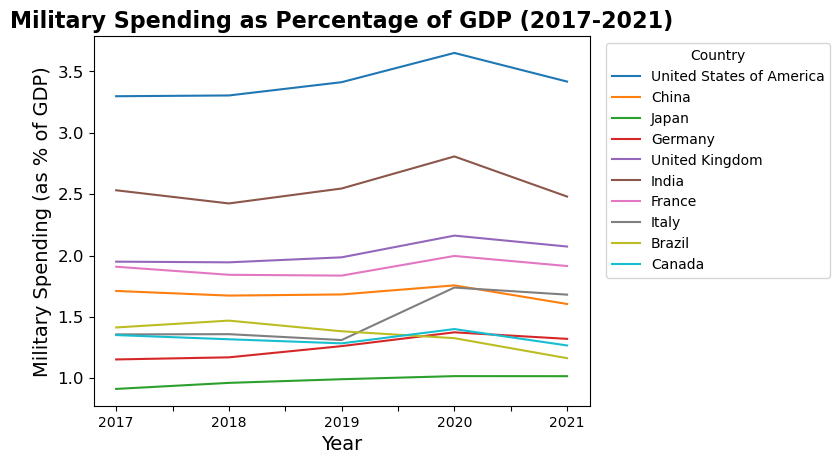

In [1205]:
compareGDP(sip_perc, 'Military')

<Figure size 1200x800 with 0 Axes>

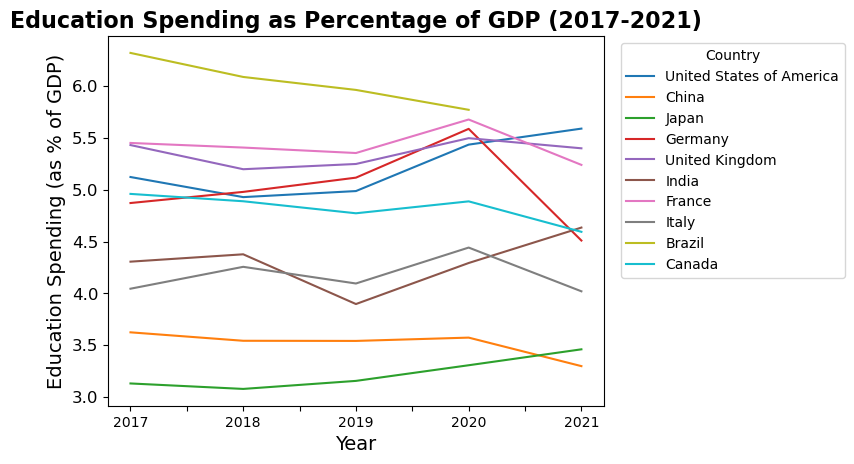

In [1206]:
compareGDP(edu, 'Education')

<Figure size 1200x800 with 0 Axes>

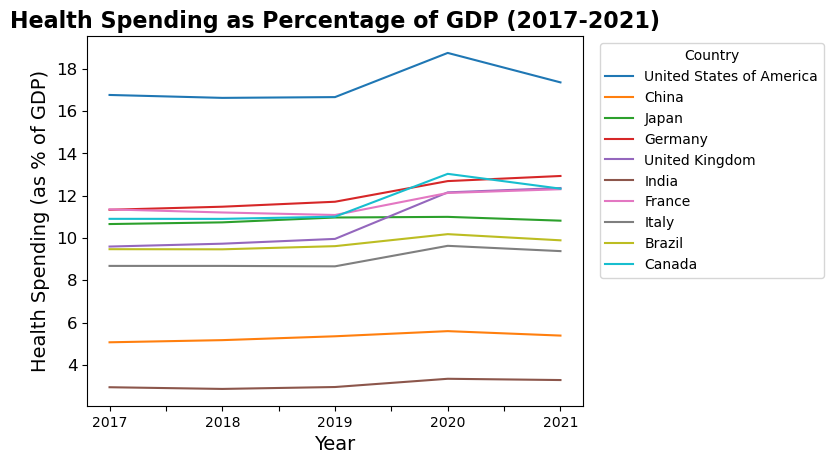

In [1207]:
compareGDP(health, 'Health')

In [1208]:
#compare education, healthcare, and military spending of the countries
def comparePie(military, health, edu, gdp, top_countries):

    #sets country column as the index for the dataframe
    military = military.set_index('Country') 
    health = health.set_index('Country')
    edu = edu.set_index('Country')
    gdp = gdp.set_index('Country')
    
    #gets average spending from 2017-2021
    military_avg = military.mean(axis=1) 
    health_avg = health.mean(axis=1) 
    edu_avg = edu.mean(axis=1) 
    gdp_avg = gdp.mean(axis=1)

    for country in top_countries: #loops over each country in top 10 list
        #gets average values for each category
        military_val = military_avg.get(country,0)
        health_val = health_avg.get(country,0)
        edu_val = edu_avg.get(country,0)
        gdp_val = gdp_avg.get(country,0)
        #convert %gdp to spend amt
        military_amt = (military_val/100) * gdp_val
        health_amt = (health_val/100) * gdp_val
        edu_amt = (edu_val/100) * gdp_val
        #deducts all military, education, and health spending from total gdp
        other_amt = gdp_val - (military_amt + health_amt + edu_amt)
        
        #values that go into the piechart
        values = [military_amt, health_amt, edu_amt, other_amt]
        #piechart labels
        labels = ['Military','Health','Education','Other']
        
        #plot pie chart
        plt.figure(figsize=(10,8))
        plt.pie(values, 
                labels=labels,
               autopct = '%1.1f%%', 
                startangle=140,
                colors=plt.cm.Paired.colors)
        plt.title(country + ' Average Spending Distribution (2017-2021)', fontsize=16,fontweight='bold')
        #saves each country's piechart
        plt.savefig(country + '_avgspend_pie.png', dpi=300, bbox_inches='tight', pad_inches=0.2)
        plt.show()

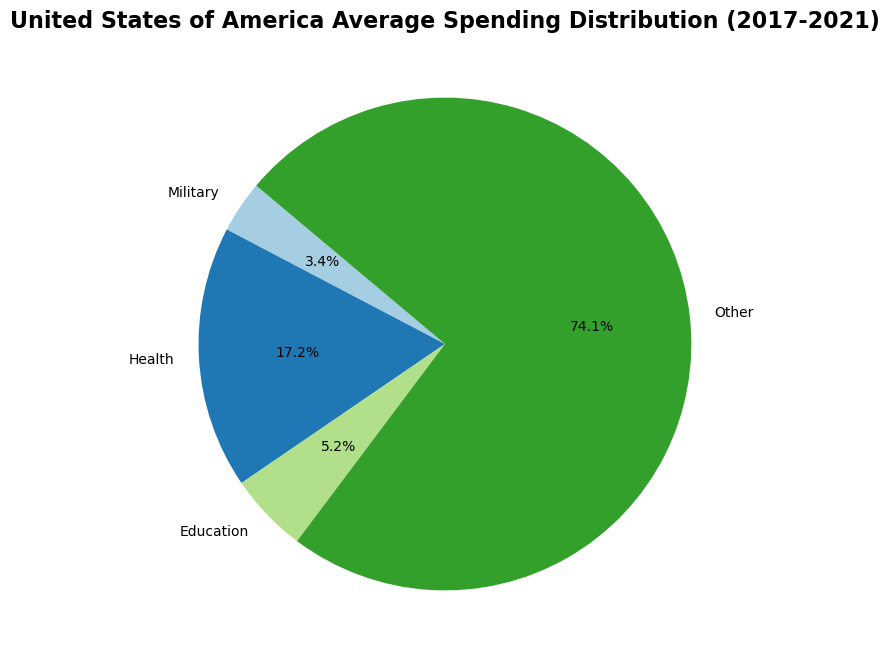

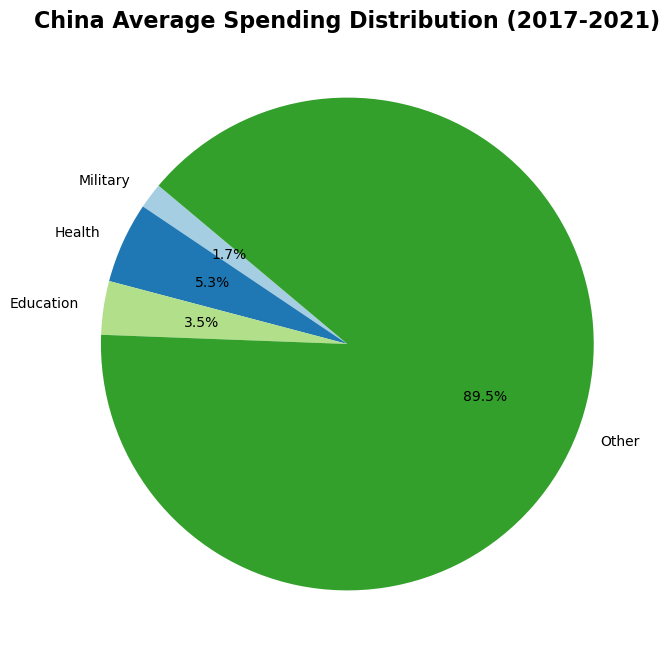

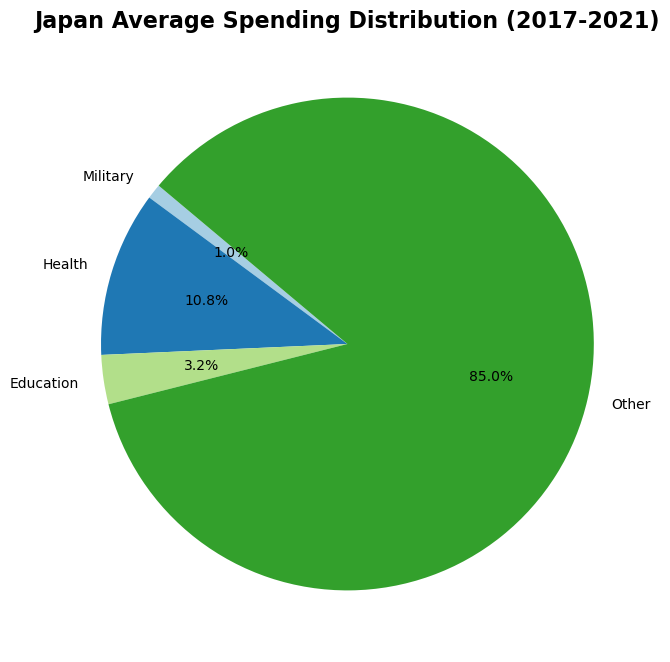

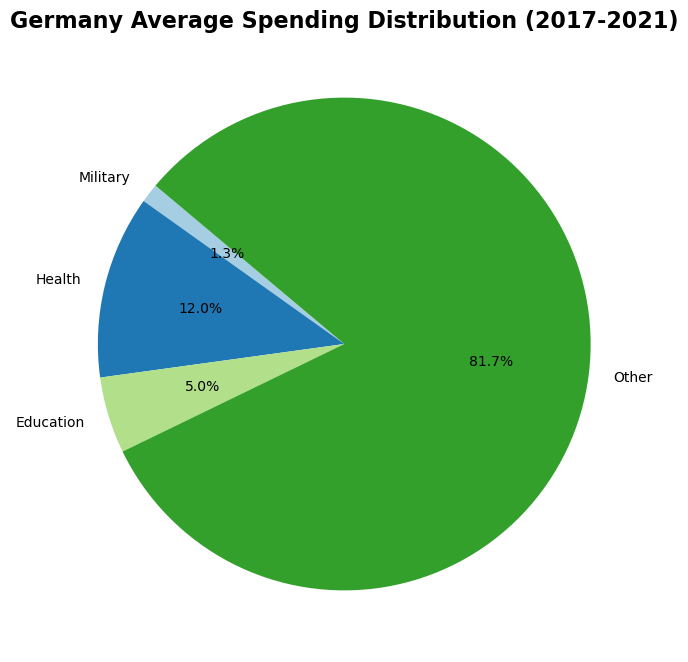

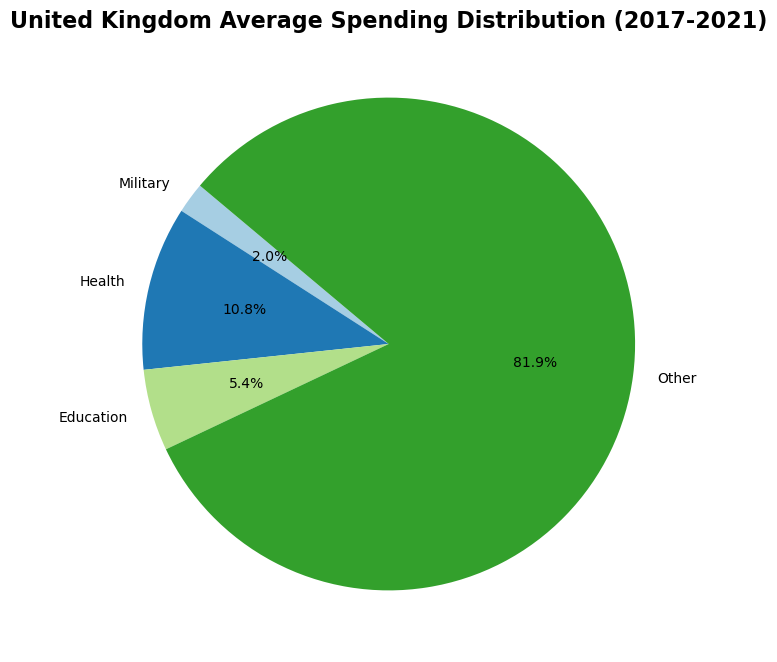

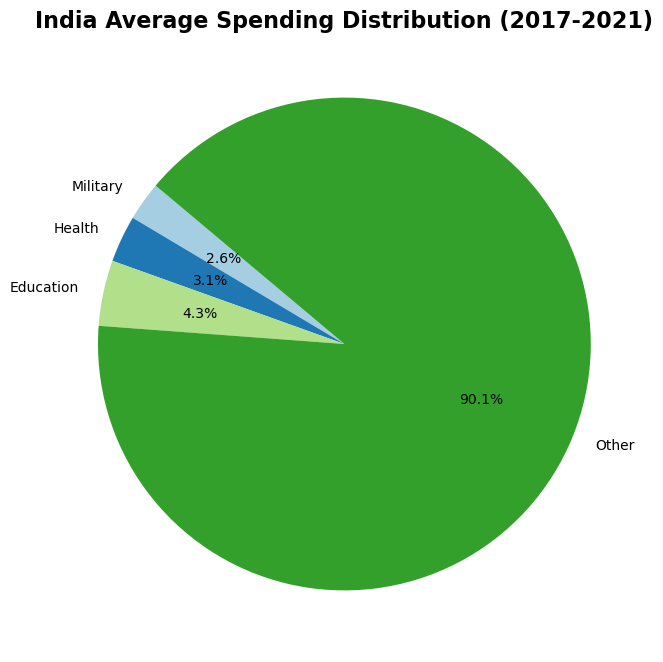

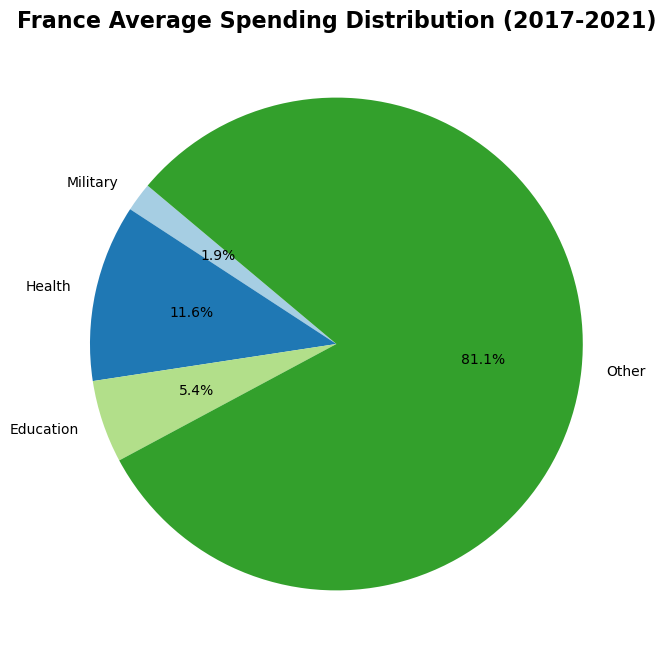

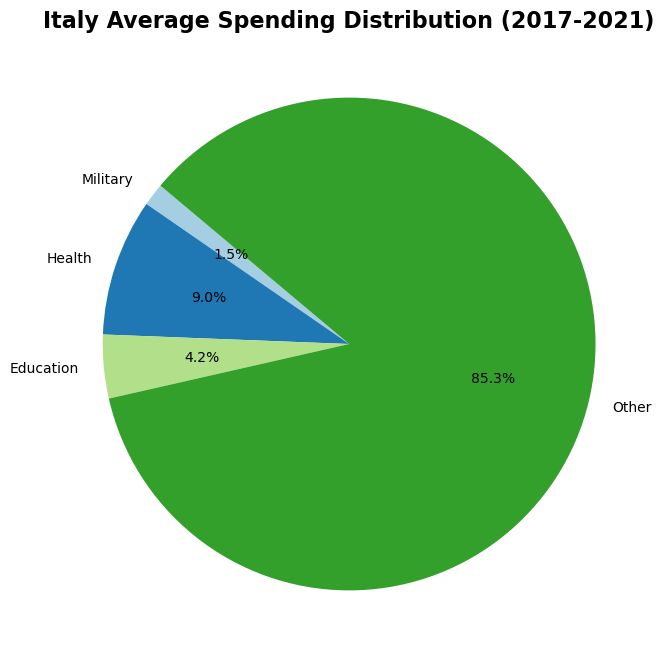

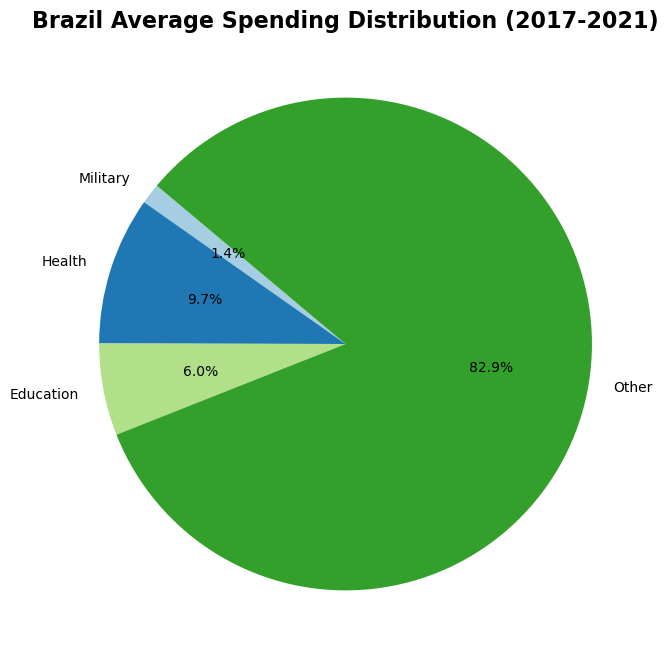

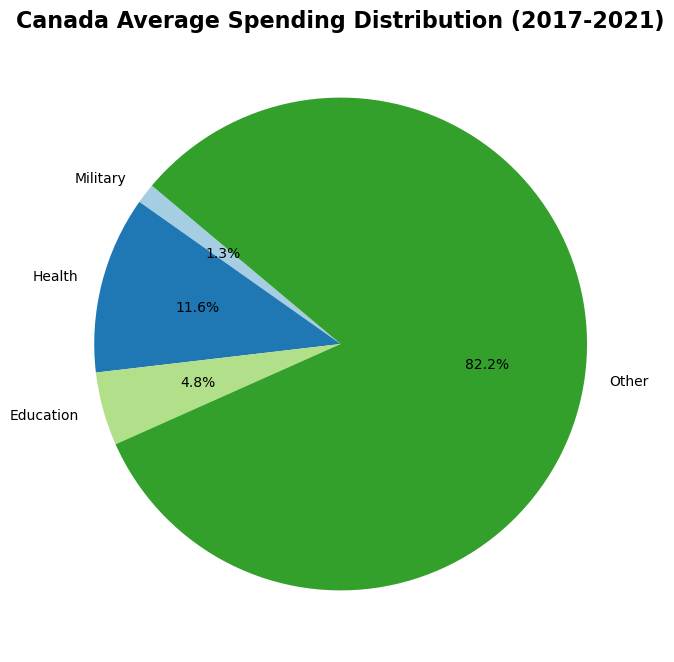

In [1209]:
comparePie(sip_perc, health, edu, gdp_top10, top_countries)

In [1210]:
#military per capita data
years = list(range(2017, 2022))

mil_percapita = percapita[percapita['Country'].isin(top_countries)]
mil_percapita = mil_percapita[['Country'] + years]
mil_percapita = mil_percapita.set_index('Country').loc[top_countries].reset_index()

mil_percapita

,Country,2017,2018,2019,2020,2021
0,United States of America,1961.0994,2054.8305,2196.5306,2317.0583,2392.3887
1,China,149.2212,164.0926,169.0264,181.0429,200.5273
2,Japan,355.7379,384.4246,403.6664,410.3680,408.9258
3,Germany,511.7292,560.9090,590.2661,639.8577,677.5423
4,United Kingdom,788.2390,840.4395,847.0867,869.8664,968.1220
5,India,47.6736,48.3986,51.6725,52.2327,54.2416
6,France,766.9566,799.8042,778.2442,818.0376,877.8261
7,Italy,440.7688,474.6413,441.6802,553.4208,611.6260
8,Brazil,140.3412,134.0715,122.3274,91.8929,89.5231
9,Canada,609.2273,613.7256,596.8306,609.2210,664.7160


In [1211]:
#finding gdp per capita
mil_percapita = mil_percapita.set_index('Country')
sip_perc = sip_perc.set_index('Country')

#divide expenditure per capita by expenditure as % of GDP
gdp_percapita = mil_percapita / (sip_perc / 100)

mil_percapita = mil_percapita.reset_index('Country')
sip_perc = sip_perc.reset_index('Country')


#makes all column headers strings
gdp_percapita.columns = gdp_percapita.columns.map(str)

In [1212]:
gdp_percapita

,2017,2018,2019,2020,2021
Country,,,,,
United States of America,59468.2769,62192.1946,64373.6390,63472.1157,70012.3763
China,8720.0474,9804.8983,10043.6922,10305.8538,12491.8933
Japan,38953.8295,39940.3255,40682.6871,40333.0682,40208.6001
Germany,44366.8754,47918.4767,46778.1501,46559.7675,51289.0492
United Kingdom,40421.9137,43220.1293,42668.9383,40230.3215,46696.4937
India,1883.2081,1996.4068,2029.5589,1860.6731,2186.8190
France,40183.3642,43396.6571,42377.3793,40974.0409,45853.7034
Italy,32472.2551,34918.3026,33677.2354,31824.3787,36378.9748
Brazil,9924.9651,9122.5108,8846.3754,6926.6375,7693.0868


In [1213]:
#finding health per capita
health = health.set_index('Country')
#finding education per capita
edu = edu.set_index('Country')

#multiply gdp per person by health expenditure as % of GDP
#multiply by .01 since values from the data are in unformatted percentages
health_percapita = gdp_percapita * health * .01
#multiply gdp per person by education expenditure as % of GDP
edu_percapita = gdp_percapita * edu * .01

health = health.reset_index('Country')
edu = edu.reset_index('Country')

health_percapita = health_percapita.reset_index('Country')
edu_percapita = edu_percapita.reset_index('Country')
gdp_percapita = gdp_percapita.reset_index('Country')

In [1214]:
health_percapita

,Country,2017,2018,2019,2020,2021
0,United States of America,9971.3444,10342.3408,10728.3857,11904.9696,12155.9464
1,China,441.7508,506.7078,537.3654,576.4680,672.5143
2,Japan,4152.4782,4289.5910,4462.8908,4436.6375,4350.5705
3,Germany,5029.5070,5501.2881,5480.2972,5909.6230,6633.7922
4,United Kingdom,3878.8378,4205.6634,4248.8106,4891.4576,5773.8811
5,India,55.3663,57.0972,59.8720,62.1465,71.7277
6,France,4562.6982,4863.8929,4699.1677,4970.5451,5643.6155
7,Italy,2818.5917,3030.9087,2916.4486,3064.6877,3412.3478
8,Brazil,940.0181,863.4229,850.5340,705.2945,760.9019
9,Canada,4914.8904,5079.3426,5115.1209,5668.9501,6469.4350


In [1215]:
edu_percapita

,Country,2017,2018,2019,2020,2021
0,United States of America,3046.4885,3065.3850,3210.4936,3449.9888,3913.6919
1,China,316.0145,347.3380,355.6526,368.2237,411.9631
2,Japan,1219.4808,1229.2914,1283.6771,1333.5282,1391.2176
3,Germany,2161.4787,2386.0191,2393.5303,2601.5690,2313.1362
4,United Kingdom,2195.4152,2246.6126,2239.5689,2211.7425,2521.6107
5,India,81.0909,87.3827,79.0919,79.8787,101.3591
6,France,2190.6363,2346.5309,2269.0672,2326.4406,2402.7340
7,Italy,1313.4832,1486.1719,1379.1738,1413.6229,1462.4348
8,Brazil,627.3054,555.4250,527.5509,399.7709,NaN
9,Canada,2235.1929,2277.1055,2217.6752,2125.7609,2409.6290


In [1216]:
def comparePercapita(category, gdp, title):
    plt.figure(figsize=(12,8))
    category = category.set_index('Country')
    gdptotal = gdp.set_index('Country')
    #loop through each country to get values
    for country in gdp['Country']:
        x = category.loc[country].tolist() #category values
        y = gdptotal.loc[country].tolist() #gdp values
        plt.scatter(x,y, label=country)

    plt.title(title + ' spending Per Person vs. GDP Per Capita', fontsize=16, fontweight='bold')
    plt.xlabel(title + ' spending Per Capita (USD $)', fontsize=14)
    plt.ylabel('GDP Per Capita (USD $)', fontsize=14)

    #legend with country names
    plt.legend(title='Country', loc='upper left', fontsize=10, bbox_to_anchor=(1.02,1), ncol=1)

    #set x-axis labels
    plt.yticks(fontsize=12)

    plt.grid(True)
    plt.margins(x=0)

    plt.savefig(title + '_spendvsgdp_abs.png', dpi=300, bbox_inches='tight', pad_inches=0.2)
    plt.show()

    

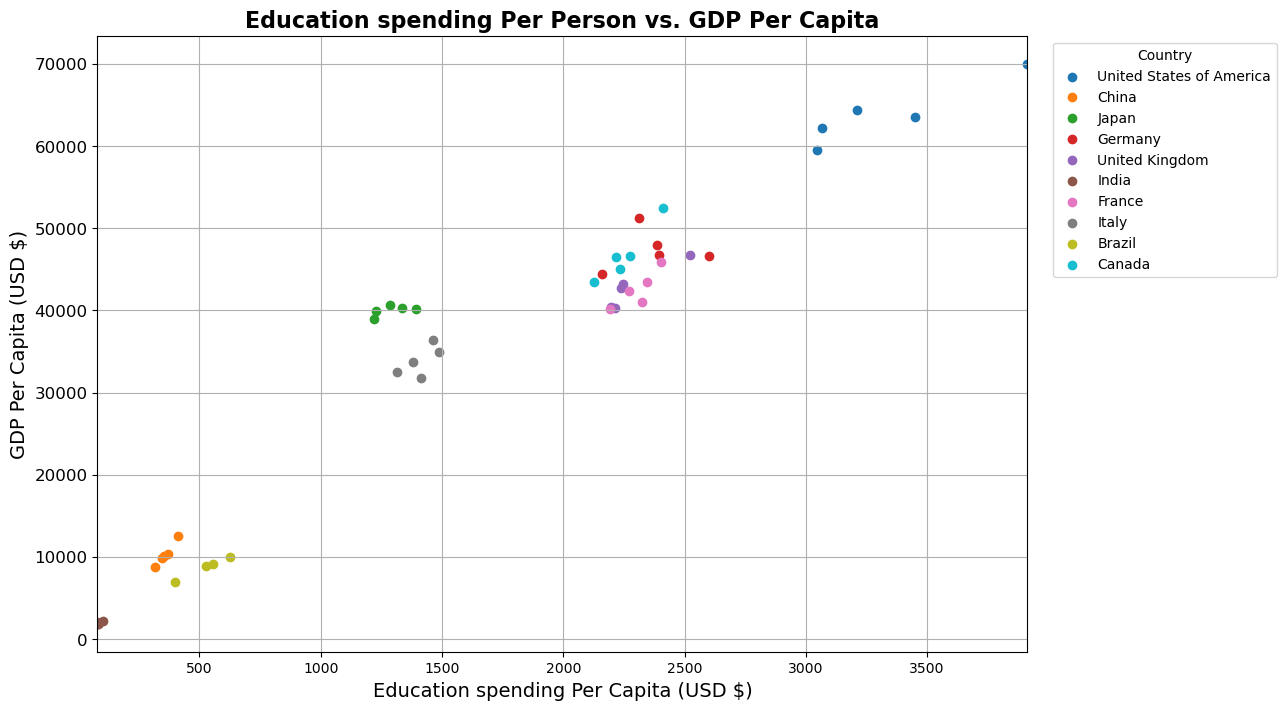

In [1217]:
comparePercapita(edu_percapita, gdp_percapita, 'Education')

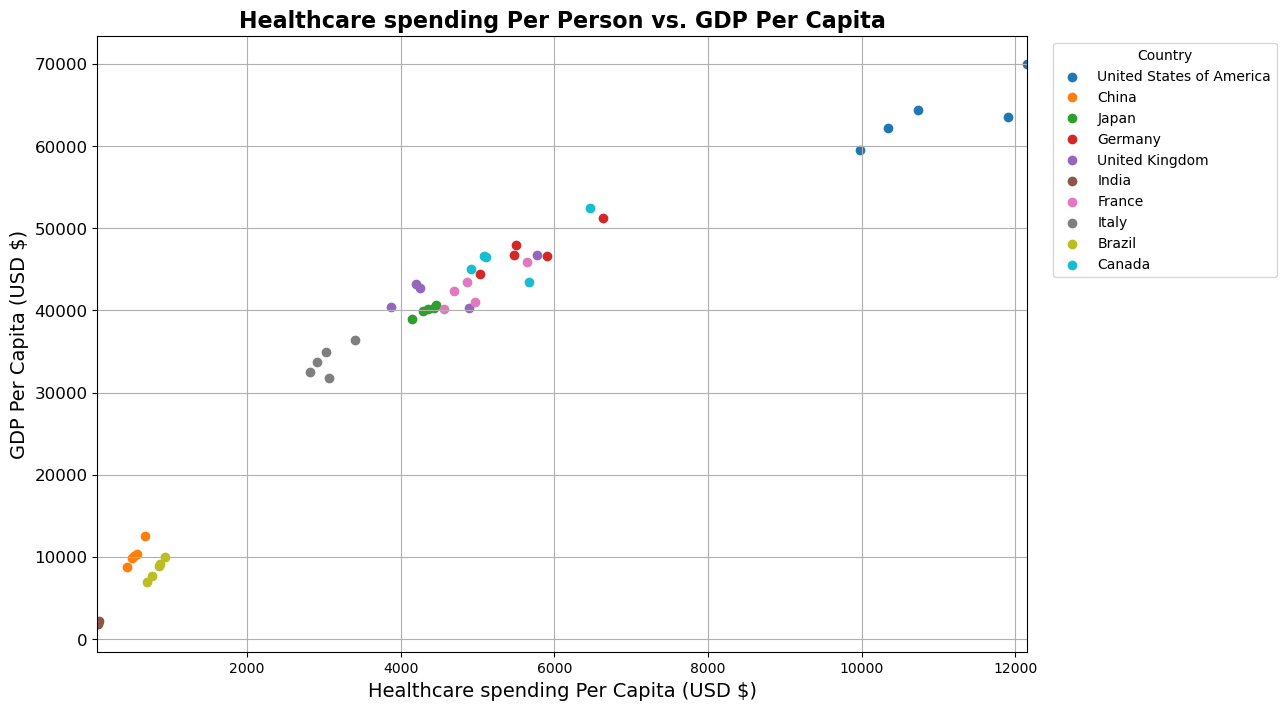

In [1218]:
comparePercapita(health_percapita, gdp_percapita, 'Healthcare')

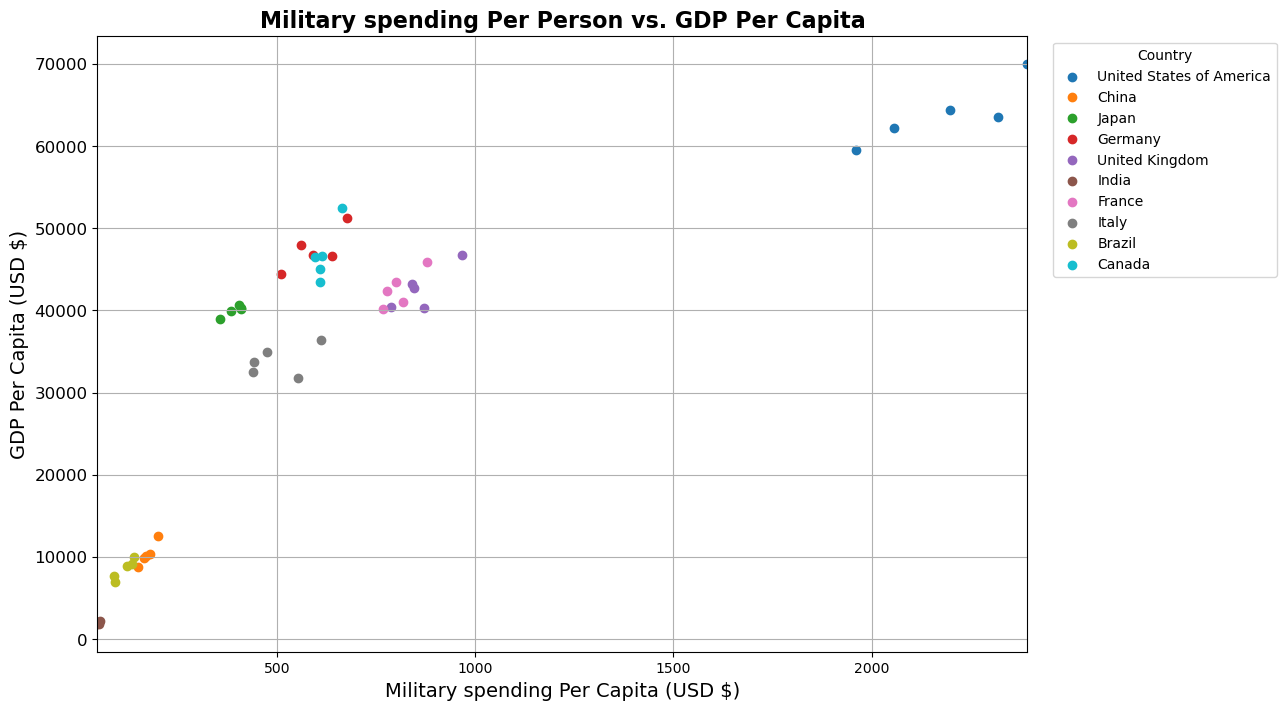

In [1219]:
comparePercapita(mil_percapita, gdp_percapita, 'Military')

In [1220]:
#military spending per person in percent
spending.columns = spending.columns.map(str)
mil_percapita.columns = mil_percapita.columns.map(str)
sip_perc.columns = sip_perc.columns.map(str)

spending = spending.set_index('Country')
mil_percapita = mil_percapita.set_index('Country')
edu_percapita = edu_percapita.set_index('Country')
health_percapita = health_percapita.set_index('Country')
sip_perc = sip_perc.set_index('Country')

#spend per capita / spend per country
mil_percapita_perc = (mil_percapita / spending)
edu_percapita_perc = (edu_percapita / spending)
health_percapita_perc = (health_percapita / spending)


#gdp data per person in percent; gdp (person) / gdp (country)
mgdp_percapita_perc = (mil_percapita_perc / (sip_perc / 100))
egdp_percapita_perc = (edu_percapita_perc / (sip_perc / 100))
hgdp_percapita_perc = (health_percapita_perc / (sip_perc / 100))

#reset 'Country' index back to a column
spending = spending.reset_index('Country')
mil_percapita = mil_percapita.reset_index('Country')
edu_percapita = edu_percapita.reset_index('Country')
health_percapita = health_percapita.reset_index('Country')
sip_perc = sip_perc.reset_index('Country')

#reset index for gdp per capita dataframes
mgdp_percapita_perc = mgdp_percapita_perc.reset_index('Country')
egdp_percapita_perc = egdp_percapita_perc.reset_index('Country')
hgdp_percapita_perc = hgdp_percapita_perc.reset_index('Country')

#reset index for spending per capita dataframes 
edu_percapita_perc = edu_percapita_perc.reset_index('Country')
mil_percapita_perc = mil_percapita_perc.reset_index('Country')
health_percapita_perc = health_percapita_perc.reset_index('Country')


In [1221]:
mgdp_percapita_perc

,Country,2017,2018,2019,2020,2021,Total
0,United States of America,0.0919,0.0911,0.0877,0.0815,0.0868,NaN
1,China,0.0414,0.0422,0.0418,0.0399,0.0437,NaN
2,Japan,0.8645,0.8229,0.8012,0.7847,0.7891,NaN
3,Germany,1.0493,1.0306,0.9531,0.8732,0.9076,NaN
4,United Kingdom,0.7762,0.7741,0.7543,0.6897,0.7169,NaN
5,India,0.0292,0.0301,0.0284,0.0255,0.0286,NaN
6,France,0.8168,0.8441,0.8455,0.7768,0.8095,NaN
7,Italy,1.2278,1.2286,1.2766,0.9665,1.0040,NaN
8,Brazil,0.3392,0.3238,0.3415,0.3536,0.4010,NaN
9,Canada,2.0236,2.0492,2.0747,1.8841,2.0681,NaN


In [1222]:
egdp_percapita_perc

,Country,2017,2018,2019,2020,2021,Total
0,United States of America,0.1428,0.1359,0.1281,0.1214,0.1421,NaN
1,China,0.0878,0.0893,0.0879,0.0813,0.0898,NaN
2,Japan,2.9636,2.6314,2.5478,2.5501,2.6845,NaN
3,Germany,4.4322,4.3838,3.8649,3.5504,3.0984,NaN
4,United Kingdom,2.1620,2.0693,1.9943,1.7536,1.8673,NaN
5,India,0.0496,0.0544,0.0435,0.0390,0.0535,NaN
6,France,2.3330,2.4766,2.4653,2.2092,2.2156,NaN
7,Italy,3.6588,3.8471,3.9862,2.4686,2.4007,NaN
8,Brazil,1.5161,1.3412,1.4726,1.5381,NaN,NaN
9,Canada,7.4243,7.6030,7.7092,6.5741,7.4970,NaN


In [1223]:
hgdp_percapita_perc

,Country,2017,2018,2019,2020,2021,Total
0,United States of America,0.4675,0.4587,0.4282,0.4190,0.4412,NaN
1,China,0.1227,0.1302,0.1329,0.1272,0.1465,NaN
2,Japan,10.0914,9.1823,8.8578,8.4841,8.3948,NaN
3,Germany,10.3133,10.1075,8.8491,8.0651,8.8859,NaN
4,United Kingdom,3.8197,3.8737,3.7834,3.8782,4.2756,NaN
5,India,0.0339,0.0355,0.0329,0.0304,0.0379,NaN
6,France,4.8593,5.1335,5.1055,4.7200,5.2041,NaN
7,Italy,7.8513,7.8458,8.4294,5.3519,5.6017,NaN
8,Brazil,2.2718,2.0850,2.3742,2.7136,3.4079,NaN
9,Canada,16.3251,16.9594,17.7815,17.5318,20.1280,NaN


In [1224]:
mgdp_percapita_perc


,Country,2017,2018,2019,2020,2021,Total
0,United States of America,0.0919,0.0911,0.0877,0.0815,0.0868,NaN
1,China,0.0414,0.0422,0.0418,0.0399,0.0437,NaN
2,Japan,0.8645,0.8229,0.8012,0.7847,0.7891,NaN
3,Germany,1.0493,1.0306,0.9531,0.8732,0.9076,NaN
4,United Kingdom,0.7762,0.7741,0.7543,0.6897,0.7169,NaN
5,India,0.0292,0.0301,0.0284,0.0255,0.0286,NaN
6,France,0.8168,0.8441,0.8455,0.7768,0.8095,NaN
7,Italy,1.2278,1.2286,1.2766,0.9665,1.0040,NaN
8,Brazil,0.3392,0.3238,0.3415,0.3536,0.4010,NaN
9,Canada,2.0236,2.0492,2.0747,1.8841,2.0681,NaN


In [1225]:
def comparePercapitaPCT(spend, gdp, title):    
    spend = spend.set_index('Country')
    gdpperc = gdp.set_index('Country')
    
    plt.figure(figsize=(12,8))
    #loop through each country in gdp dataframe
    for country in gdp['Country']:
        x = spend.loc[country].tolist() #spend per capita
        y = gdpperc.loc[country].tolist() #gdp per capita
        plt.scatter(x,y, label=country)

    plt.title(title + ' spending Per Person vs. GDP Per Capita (in %)', fontsize=16, fontweight='bold')
    plt.xlabel(title + ' spending Per Capita (in %)', fontsize=14)
    plt.ylabel('GDP Per Capita (in %)', fontsize=14)

    #legend with country names
    plt.legend(title='Country', loc='upper left', fontsize=10, bbox_to_anchor=(1.02,1), ncol=1)

    #set x-axis labels
    plt.yticks(fontsize=12)

    plt.grid(True)
    plt.margins(x=0)

    plt.savefig(title + '_spendvsgdp_pct.png', dpi=300, bbox_inches='tight', pad_inches=0.2)
    plt.show()

    

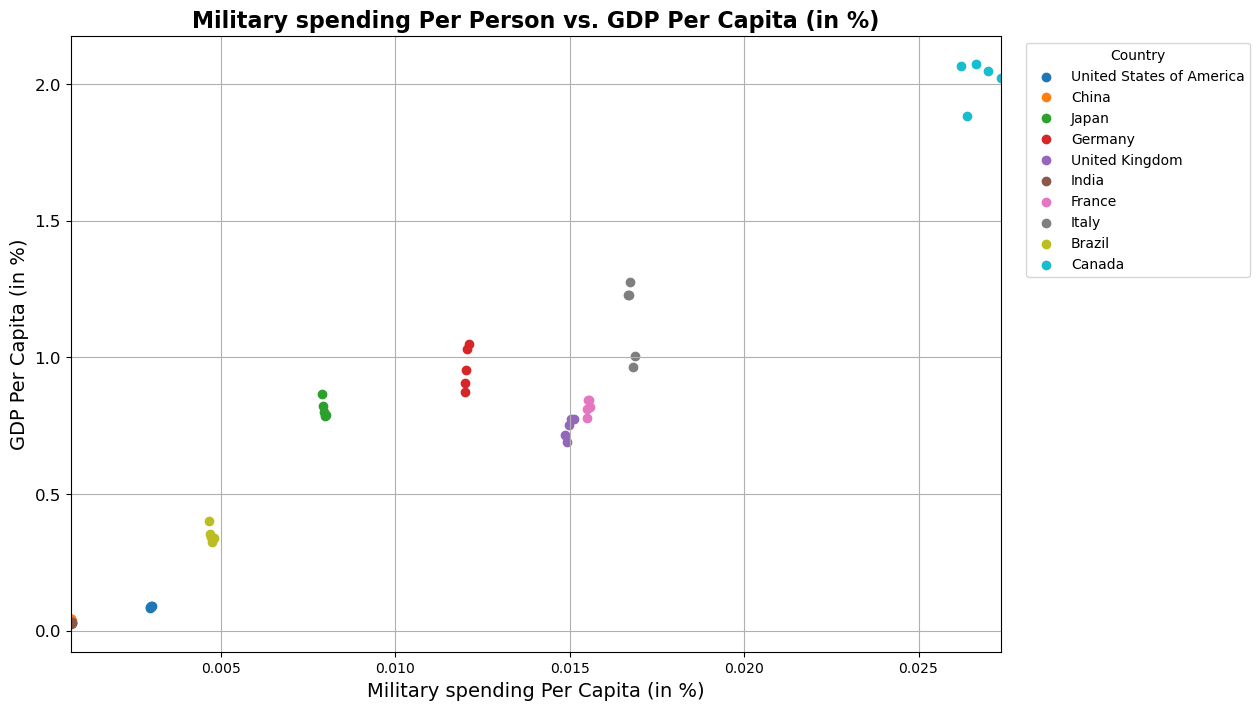

In [1226]:
comparePercapitaPCT(mil_percapita_perc, mgdp_percapita_perc, 'Military')

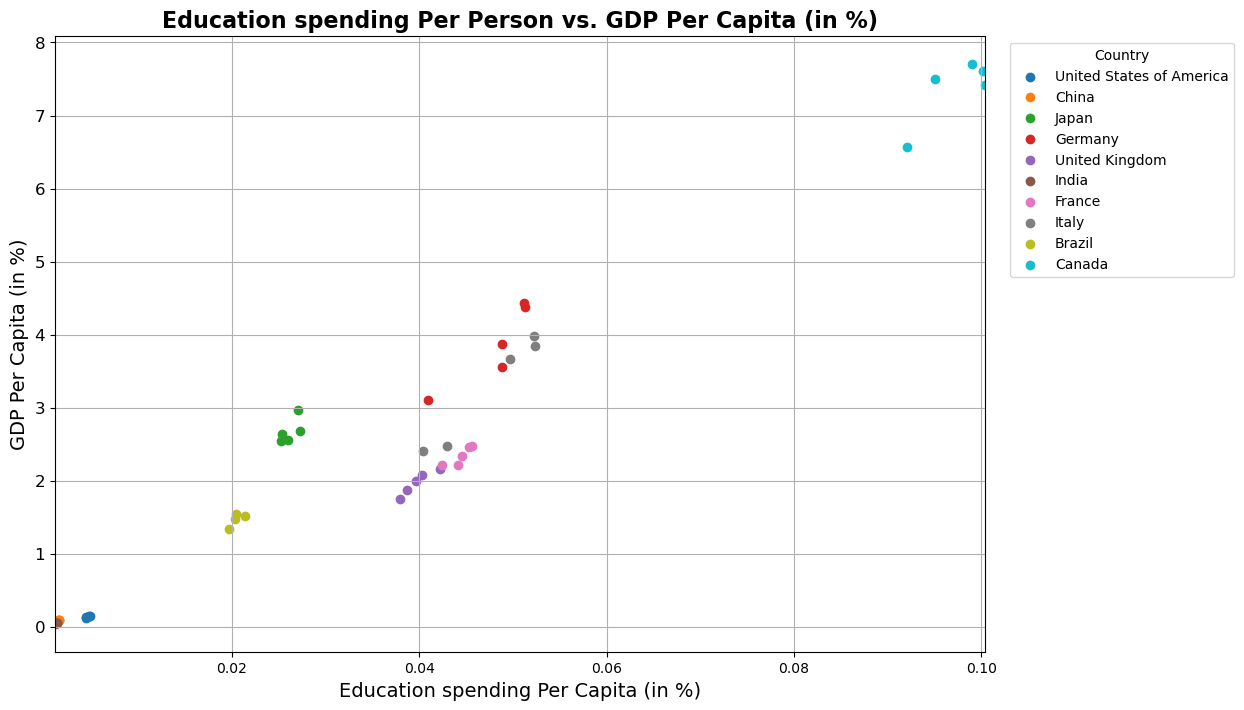

In [1227]:
comparePercapitaPCT(edu_percapita_perc, egdp_percapita_perc, 'Education')

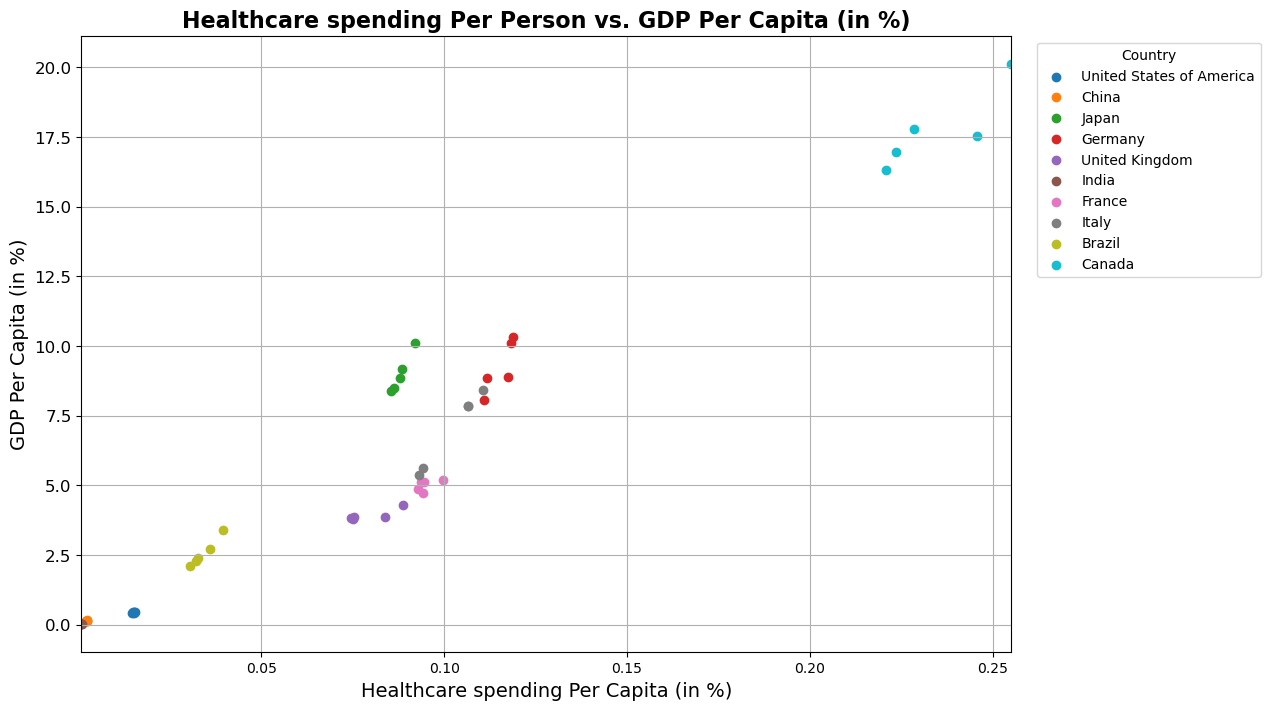

In [1228]:
comparePercapitaPCT(health_percapita_perc, hgdp_percapita_perc, 'Healthcare')

In [1229]:
#calculate raw health and education spending
#convert all column names to strings
gdp_top10.columns = gdp_top10.columns.map(str)

edu = edu.set_index('Country')
health = health.set_index('Country')
gdp_top10 = gdp_top10.set_index('Country')

#convert values in dataframe to percentages, and multiply by gdp to get raw spending values
health_spend = (health / 100) * gdp_top10
edu_spend = (edu / 100) * gdp_top10

#reset 'country' index back to regular columns
edu = edu.reset_index('Country')
health = health.reset_index('Country')
gdp_top10 = gdp_top10.reset_index('Country')
health_spend = health_spend.reset_index('Country')
edu_spend = edu_spend.reset_index('Country')

In [1230]:
years = list(map(str, range(2017, 2022)))
health_spend.columns = health_spend.columns.map(str)
edu_spend.columns = edu_spend.columns.map(str)

health_spend = health_spend.set_index('Country')
edu_spend = edu_spend.set_index('Country')

#filter columns for years 2017-2021
health_total = health_spend.groupby('Country')[years].sum()
edu_total = edu_spend.groupby('Country')[years].sum()

#total column summing all the spending across all 5 years
health_total['Total'] = health_total[years].sum(axis=1)
edu_total['Total'] = edu_total[years].sum(axis=1)

health_spend = health_spend.reset_index('Country')
edu_spend = edu_spend.reset_index('Country')
health_total = health_total.reset_index('Country')
edu_total = edu_total.reset_index('Country')

In [1231]:
#create dataframe containing only country names and total spending of each category
allcat = pd.DataFrame({'Country':spending['Country'],
                    'Health': health_total['Total'],
                       'Education': edu_total['Total'],
                       'Military': spending['Total']})

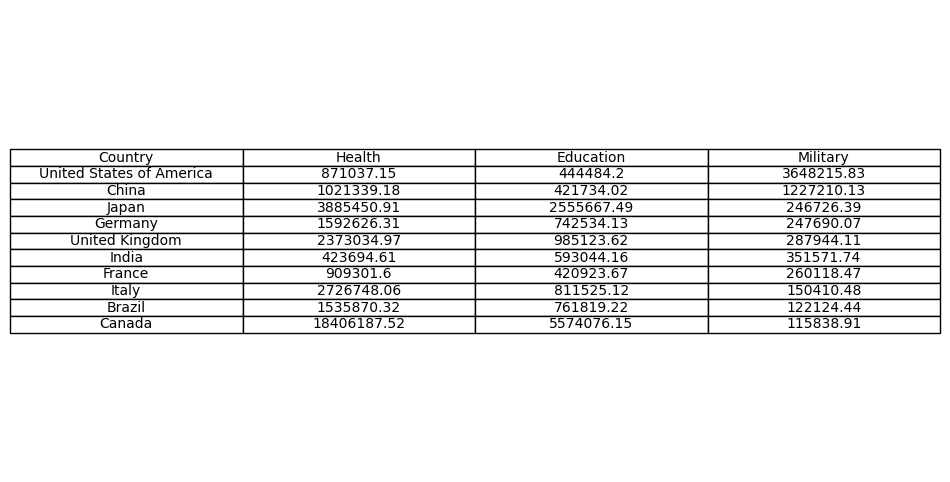

In [1232]:
#raw spending across all categories

#formatting to two decimals
allcat = allcat.round(2)

fig, ax = plt.subplots(figsize=(12,6))
ax.axis('off') #hides axis
ax.table(cellText=allcat.head(10).values,
         colLabels=allcat.columns,
         cellLoc='center', #appear in the center
         loc='center')

plt.savefig('allcat_spend.png', dpi=300, bbox_inches='tight', pad_inches=0.2)
plt.show()

In [1233]:
def growth_pct(category, title):

    #plot GDP spending as percentage of GDP for each country
    plt.figure(figsize=(12,8))

    #calculate growth rate per country from 2017-2021
    category['Growth_Rate'] = (category['2021']-category['2017']) / category['2017'] *100

    #create a bar chart comparing growth rates 
    plt.bar(category['Country'],category['Growth_Rate'], color='blue', alpha=0.7)
    plt.xticks(rotation=45, ha="right")

    #title and labels
    plt.title(title + ' Growth Rate (2017-2021)', fontsize=16, fontweight='bold')
    plt.xlabel('Country', fontsize=14)
    plt.ylabel('Percentage Growth by %', fontsize=14)

    plt.margins(x=0)
    plt.savefig(title +'_growthrate_barchart.png', dpi=300, bbox_inches='tight', pad_inches=0.2)
    plt.show()

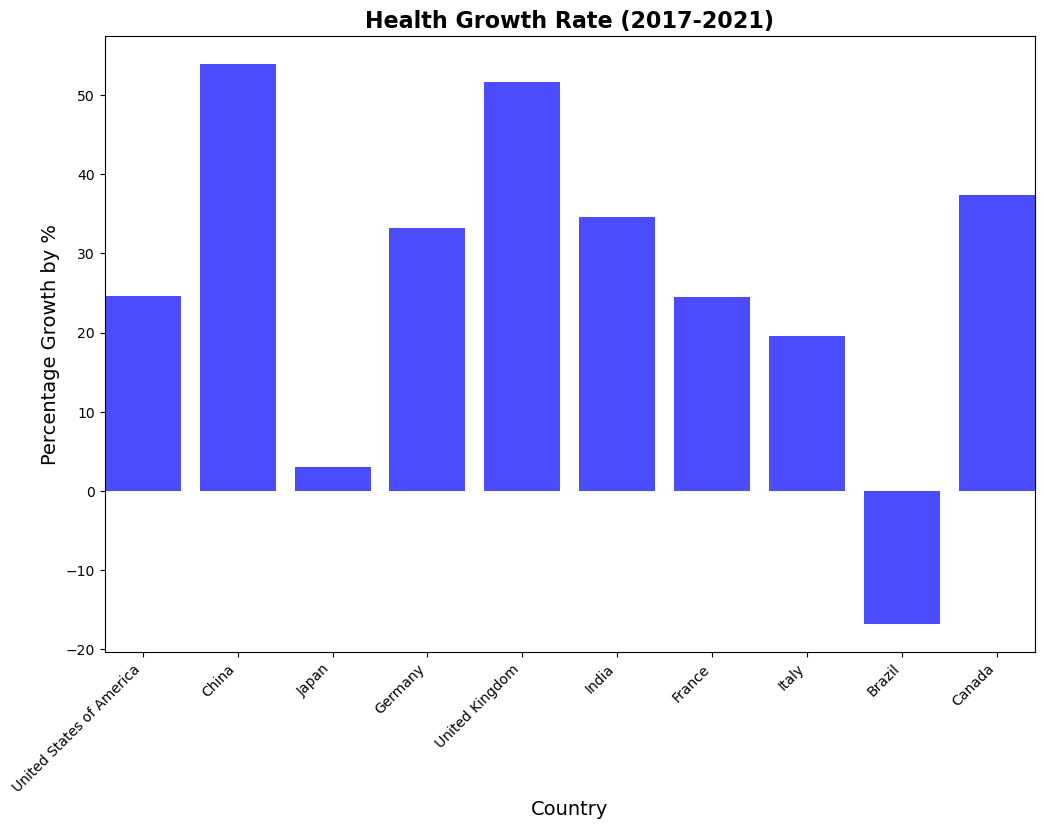

In [1234]:
growth_pct(health_spend, 'Health')

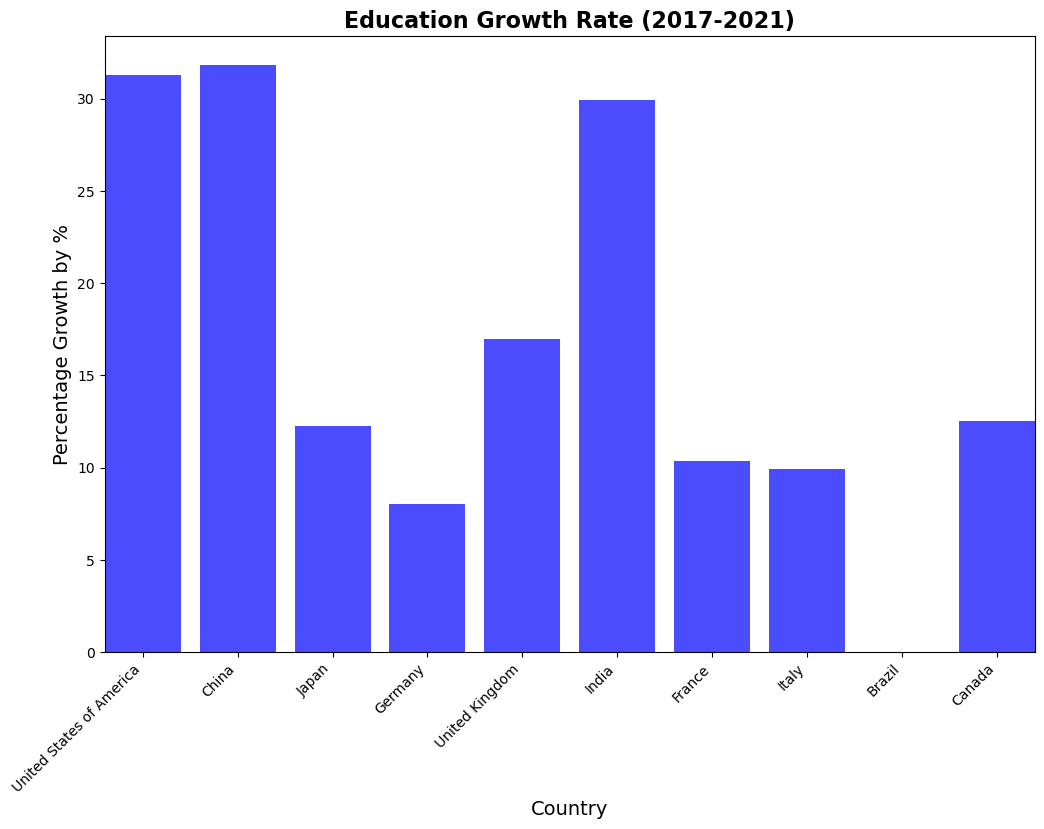

In [1235]:
growth_pct(edu_spend, 'Education')

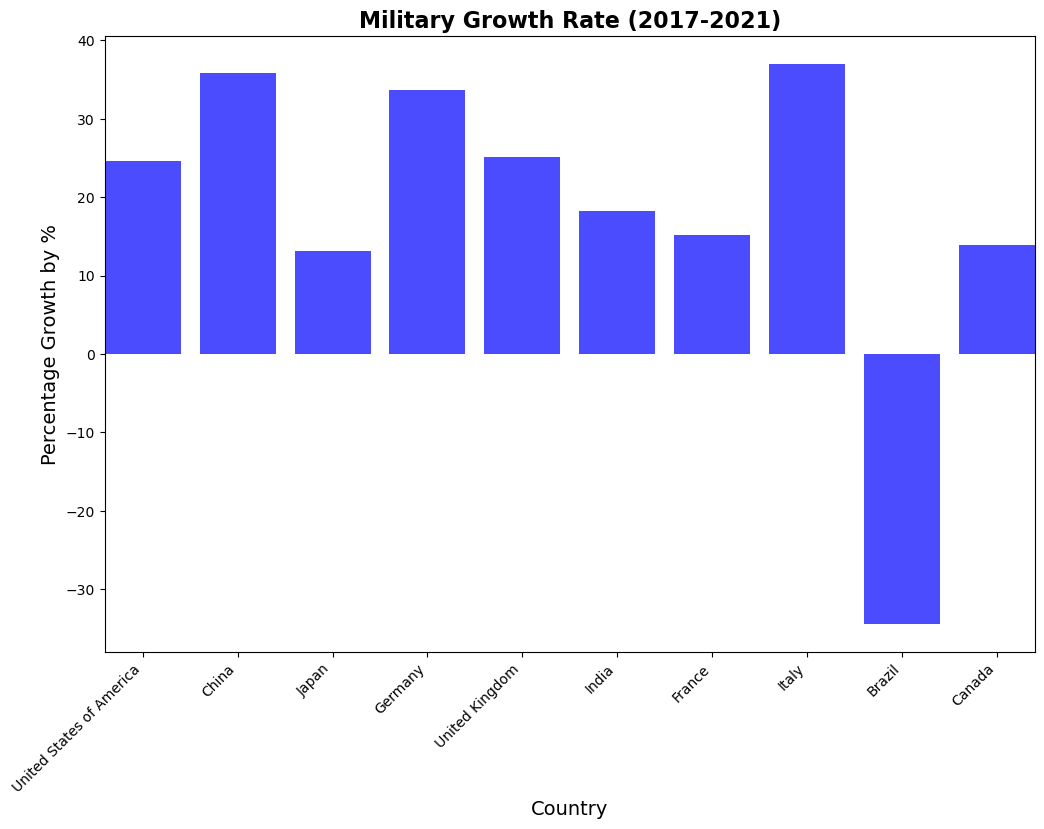

In [1236]:
growth_pct(spending, 'Military')

In [1237]:
def growth_fixed(category, title):

    #plot GDP spending as percentage of GDP for each country
    plt.figure(figsize=(12,8))

    #calculate growth rate per country from 2017-2021
    category['Fixed_Growth'] = (category['2021']-category['2017'])

    #create a bar chart comparing growth rates 
    plt.bar(category['Country'],category['Fixed_Growth'], color='red', alpha=0.7)
    plt.xticks(rotation=45, ha="right")

    #title and labels
    plt.title(title + ' Fixed Growth (2017-2021)', fontsize=16, fontweight='bold')
    plt.xlabel('Country', fontsize=14)
    plt.ylabel(title + ' Spending Growth (USD, Millions$)', fontsize=14)

    plt.margins(x=0)
    plt.savefig(title + '_fixedgrowth_barchart.png', dpi=300, bbox_inches='tight', pad_inches=0.2)
    plt.show()

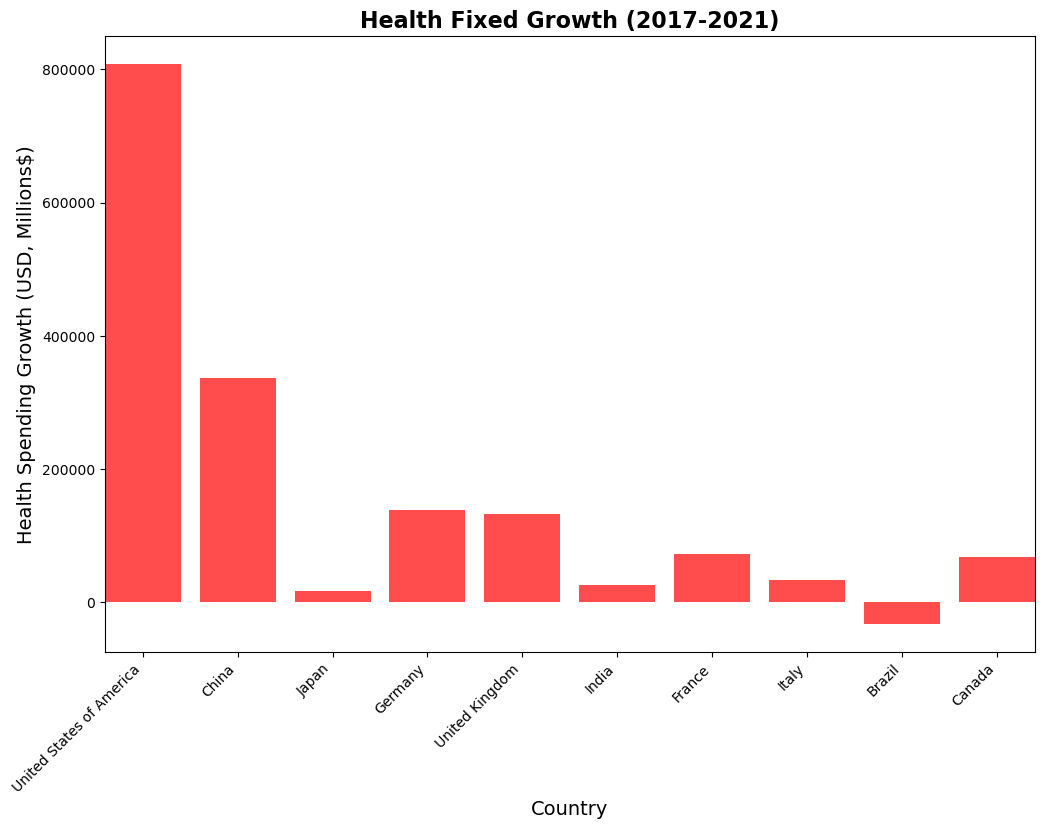

In [1238]:
growth_fixed(health_spend, 'Health')

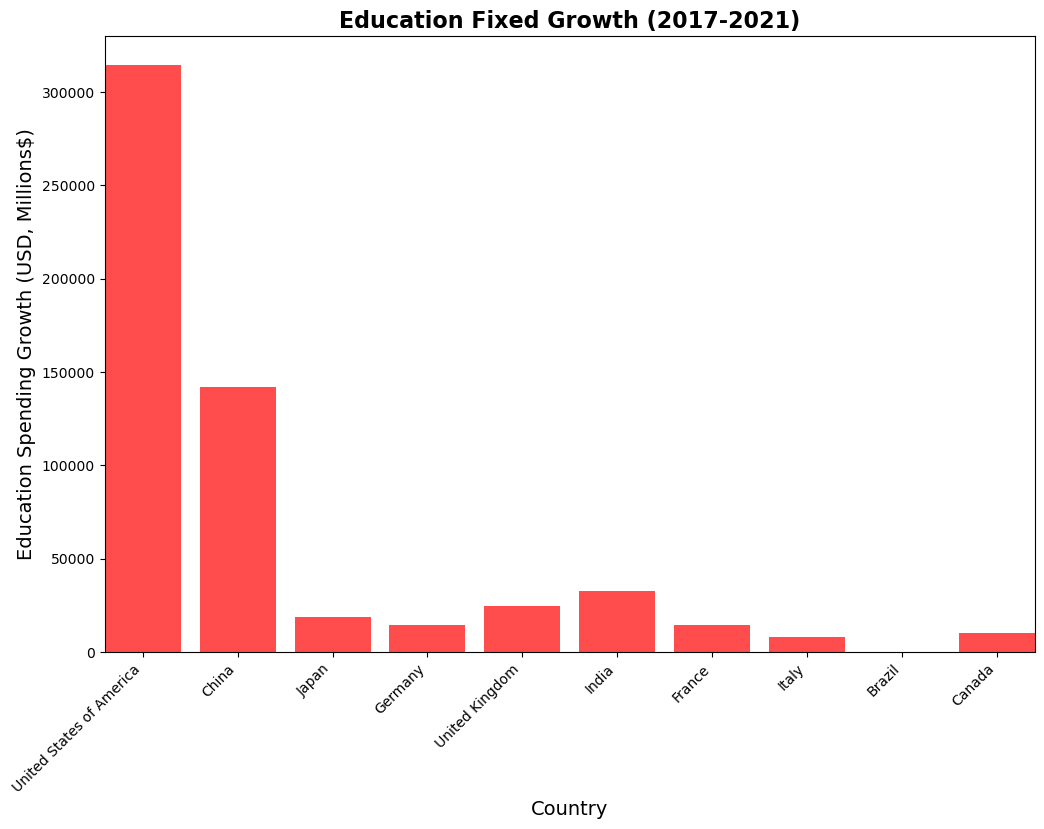

In [1239]:
growth_fixed(edu_spend, 'Education')

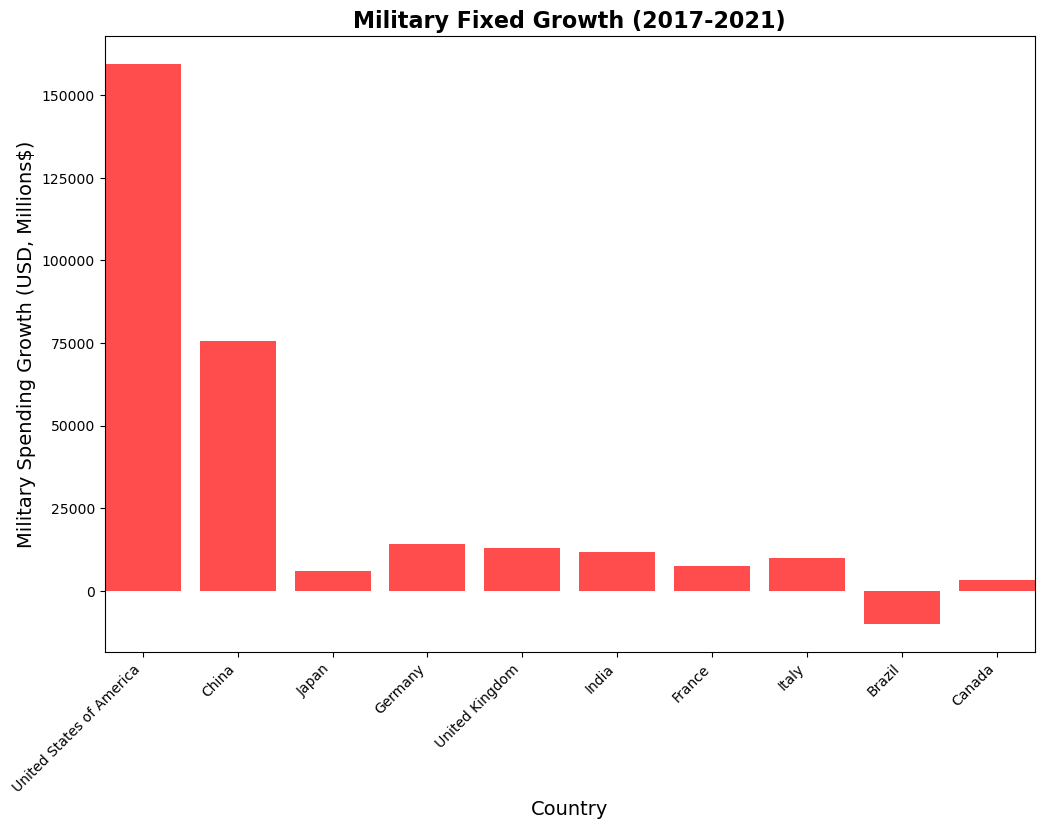

In [1240]:
growth_fixed(spending, 'Military')

In [1241]:
def compareBar(spending, health, education):
    plt.figure(figsize=(12,8))
    spending_new = spending.set_index('Country')
    health_new = health.set_index('Country')
    education_new = education.set_index('Country')
    
    spending_new = spending_new.mean(axis=1)
    health_new = health_new.mean(axis=1)
    education_new = education_new.mean(axis=1)

    combined = pd.DataFrame({
    'Military Spending': spending_new,
    'Healthcare Spending': health_new,
    'Education Spending': education_new
    }, index=spending['Country'])

    x = np.arange(len(spending['Country']))  # the label locations
    width = 0.25 

    fig, ax = plt.subplots(figsize=(16,10))

    rects1 = ax.bar(x - width, combined['Military Spending'], width, label='Military Spending')
    rects2 = ax.bar(x,        combined['Healthcare Spending'], width, label='Healthcare Spending')
    rects3 = ax.bar(x + width, combined['Education Spending'], width, label='Education Spending')

    ax.set_ylabel('USD (Billions $)')
    ax.set_title('Average Spending (2017-2021)')
    ax.set_xticks(x)
    ax.set_xticklabels(spending['Country'])
    ax.legend()

    plt.savefig('spend_barchart.png', dpi=300, bbox_inches='tight', pad_inches=0.2)
    plt.show()

In [1242]:
#removing unwanted columns from dataframe
health_spend = health_spend.drop(['Growth_Rate', 'Fixed_Growth'], axis=1)
edu_spend = edu_spend.drop(['Growth_Rate','Fixed_Growth'], axis=1)
spending = spending.drop(['Total','Fixed_Growth', 'Growth_Rate'], axis=1)



<Figure size 1200x800 with 0 Axes>

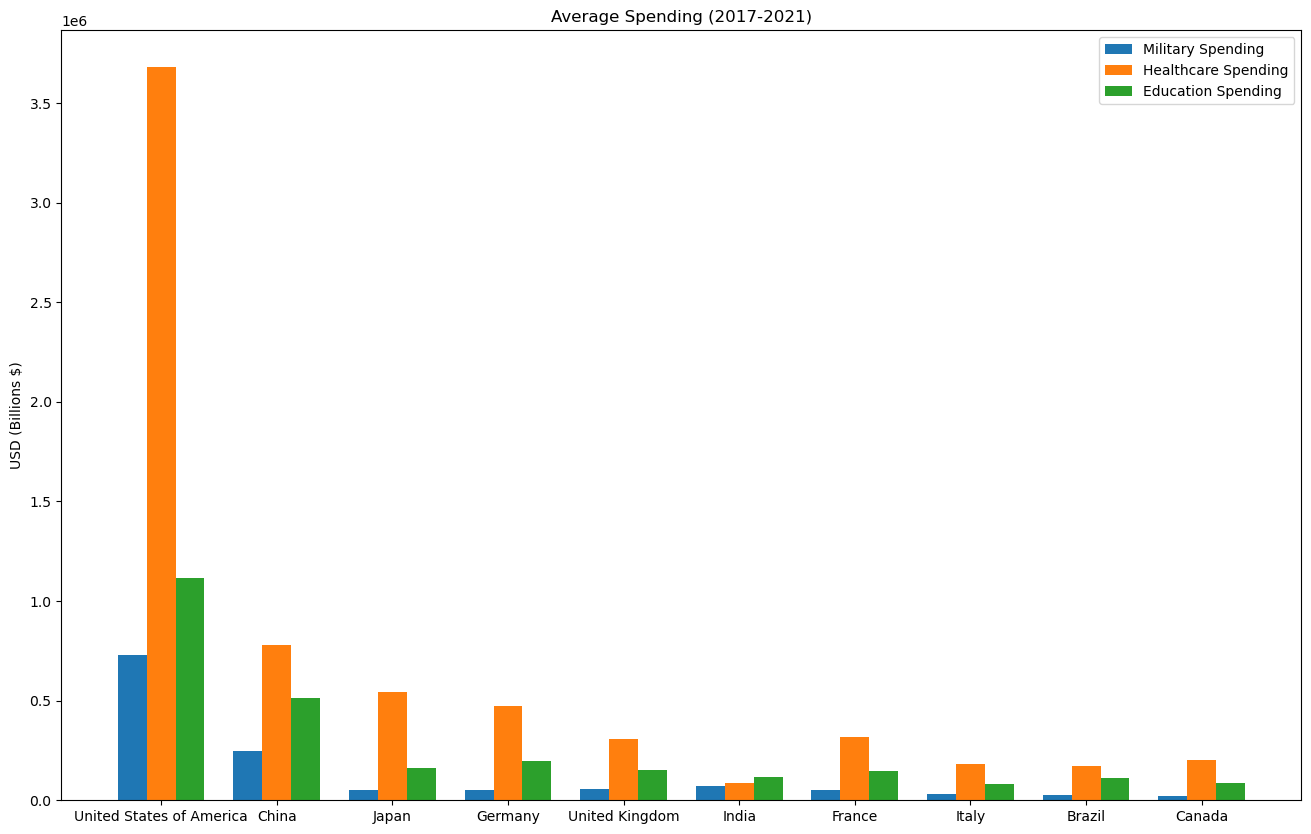

In [1243]:
compareBar(spending, health_spend, edu_spend)